<a href="https://colab.research.google.com/github/tgubbe/CreditCardDefault/blob/main/Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Credit Card Default Using Predictive Modeling**

In this session, I examine the Credit Card Clients data set found on the UCI Machine Learning Repository website to determine if a person will default on their credit card using logistic regression, random forest, and a neural network. 

**About the Data**

The data set can be found on the UCI Machine Learning Repository site at the following link: <https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients>.

The data contains 24 variables and a total of 30,000 individual instances. The variables are:

* Default Payment (0 = No, 1 = Yes)
* Amount of Given Credit
* Gender (1 = Male, 2 = Female)
* Education (1 = Graduate School, 2 = University, 3 = High School, 4 = Other, 5 = Unknown)
* Marital Status (1 = Married, 2 = Single, 3 = Others)
* Age
* History of Past Payment from April 2005 to September 2005 where -2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 9=payment delay for nine months and above
* Amount of Bill Statement from April 2005 to September 2005 
* Amount of Previous Payment April 2005 to September 2005

There is a separate variable for each past payment, bill statement, and previous payment from April to September.

## **Setup**

Below are the imports used for the data, including pandas, seaborn, numpy, scikit-learn, and matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
sns.set_style('darkgrid')

I imported the data from my Google Drive. The data is then loaded into a dataframe named "credit".

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
credit = pd.read_csv('/content/gdrive/My Drive/Datasets/Credit_Card.csv')

## **Exploratory Data Analysis**

First, the data is explored to view the patterns and trends.

In [ ]:
credit.head()

,ID,Limit_Bal,Sex,Education,Marriage,Age,Pay_Sep,Pay_Aug,Pay_July,Pay_June,...,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_July,Pay_Amt_June,Pay_Amt_May,Pay_Amt_April,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   Limit_Bal       30000 non-null  int64
 2   Sex             30000 non-null  int64
 3   Education       30000 non-null  int64
 4   Marriage        30000 non-null  int64
 5   Age             30000 non-null  int64
 6   Pay_Sep         30000 non-null  int64
 7   Pay_Aug         30000 non-null  int64
 8   Pay_July        30000 non-null  int64
 9   Pay_June        30000 non-null  int64
 10  Pay_May         30000 non-null  int64
 11  Pay_April       30000 non-null  int64
 12  Bill_Amt_Sep    30000 non-null  int64
 13  Bill_Amt_Aug    30000 non-null  int64
 14  Bill_Amt_July   30000 non-null  int64
 15  Bill_Amt_June   30000 non-null  int64
 16  Bill_Amt_May    30000 non-null  int64
 17  Bill_Amt_April  30000 non-null  int64
 18  Pay_Amt_Sep     30000 non-

From the info above, we have 30,000 entries and 25 columns, with no missing values.

In [ ]:
credit.describe()

,ID,Limit_Bal,Sex,Education,Marriage,Age,Pay_Sep,Pay_Aug,Pay_July,Pay_June,...,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_July,Pay_Amt_June,Pay_Amt_May,Pay_Amt_April,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853767,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.784391,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The column 'ID' is dropped since it won't be needed in the analysis.

In [ ]:
credit = credit.drop('ID', axis = 1)

Duplicates are checked in the code below. It can be confirmed there are no missing values or duplicated entries.

In [ ]:
credit.duplicated().sum()

35

In [ ]:
credit = credit.drop_duplicates()

Next, distribution plots are used to see if the data is normalized. From the two plots run below, it is clear the data is not normalized. The values will need to be scaled for accuracy. This will be done at a later point.

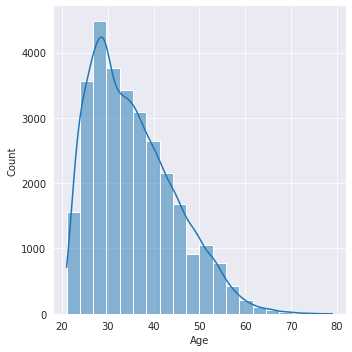

In [ ]:
sns.displot(credit['Age'], bins = 20, kde = True)

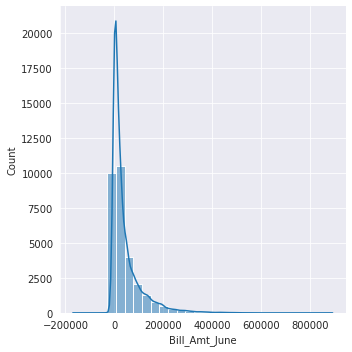

In [ ]:
sns.displot(credit['Bill_Amt_June'], bins = 30, kde = True)

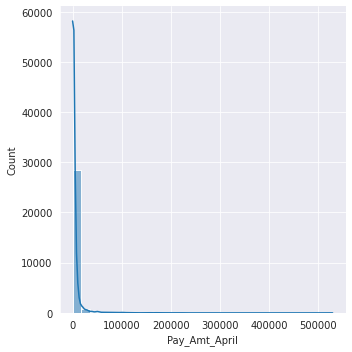

In [ ]:
sns.displot(credit['Pay_Amt_April'], bins = 30, kde = True)

A correlation heatmap is created to see the relationships between the variables.

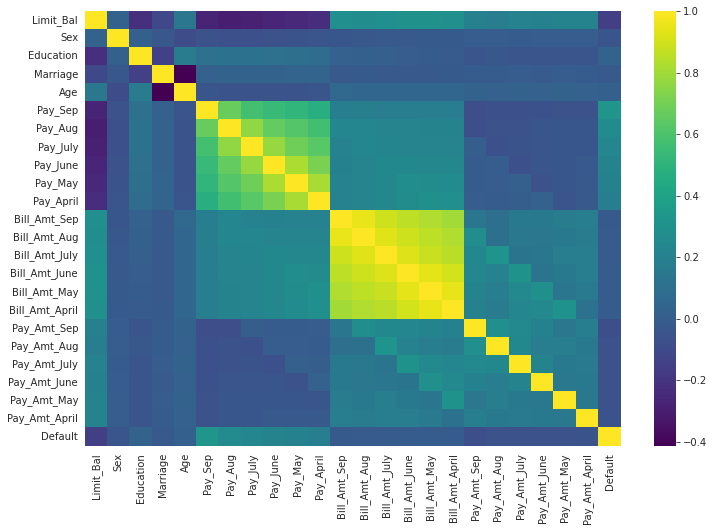

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(credit.corr(), cmap = 'viridis')

Countplots are created to see distribution between the sex, education, and marriage status variables.

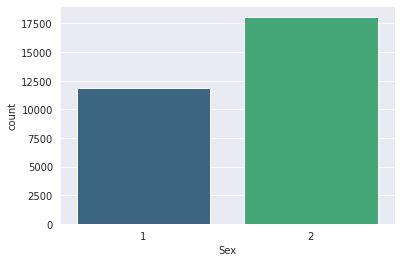

In [ ]:
sns.countplot(x = 'Sex', data= credit, palette = 'viridis')

In [ ]:
credit['Sex'].value_counts()

2    18091
1    11874
Name: Sex, dtype: int64

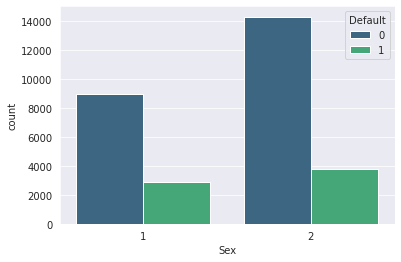

In [ ]:
sns.countplot(x = 'Sex', data = credit, palette = 'viridis', hue = 'Default')

In [ ]:
credit['Education'].value_counts()

2    14019
1    10563
3     4915
5      345
4      123
Name: Education, dtype: int64

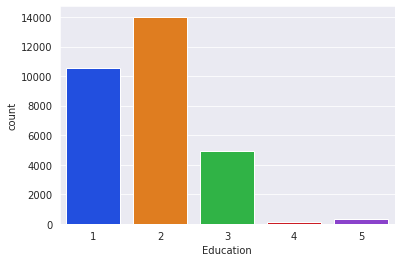

In [ ]:
sns.countplot(x ='Education', data = credit, palette = 'bright')

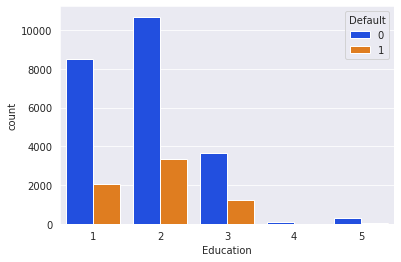

In [ ]:
sns.countplot(x = 'Education', data = credit, palette = 'bright', hue = 'Default')

In [ ]:
credit['Marriage'].value_counts()

2    15945
1    13643
3      323
0       54
Name: Marriage, dtype: int64

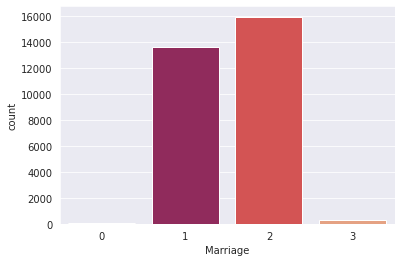

In [ ]:
sns.countplot(x = 'Marriage', data = credit, palette = 'rocket')

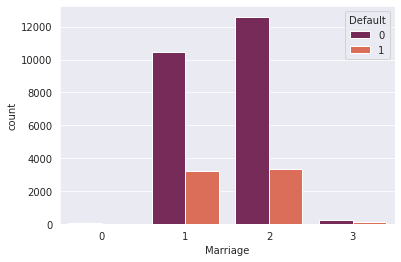

In [ ]:
sns.countplot(x = 'Marriage', data = credit, palette = 'rocket', hue = 'Default')

## **A Brief Look Into Outliers**

From the above distribution plots, there appear to be outliers in the data. One way to see if there are outliers is to use box plots. A box plot is done for the amount of credit given (Limit_Bal) and the pay amount in April. 

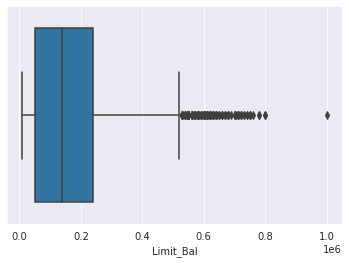

In [ ]:
sns.boxplot(x = 'Limit_Bal', data = credit)

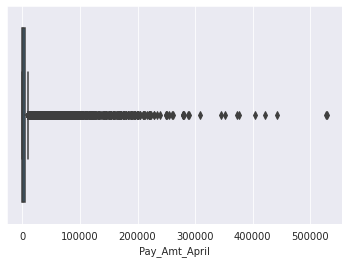

In [ ]:
sns.boxplot(x = 'Pay_Amt_April', data = credit)

There appears to be quite a few outliers for the amount of credit given past 0.6 (600,000) and the pay amount for April above 50,000. These are most likely rare occurences of very wealthy individuals or for business purposes. To remove some of these outliers, the dataframe is redone with the limit balance capped at 550,000 and the pay amount for April capped at 50,000. 

In [ ]:
credit = credit[(credit['Limit_Bal'] <= 550000) & (credit['Pay_Amt_April'] <= 50000)]

The updated dataframe is viewed to see how many participants are remaining, which appears to be 29,327 entries left. In total, about 2.24% of the original data was removed.

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29327 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Limit_Bal       29327 non-null  int64
 1   Sex             29327 non-null  int64
 2   Education       29327 non-null  int64
 3   Marriage        29327 non-null  int64
 4   Age             29327 non-null  int64
 5   Pay_Sep         29327 non-null  int64
 6   Pay_Aug         29327 non-null  int64
 7   Pay_July        29327 non-null  int64
 8   Pay_June        29327 non-null  int64
 9   Pay_May         29327 non-null  int64
 10  Pay_April       29327 non-null  int64
 11  Bill_Amt_Sep    29327 non-null  int64
 12  Bill_Amt_Aug    29327 non-null  int64
 13  Bill_Amt_July   29327 non-null  int64
 14  Bill_Amt_June   29327 non-null  int64
 15  Bill_Amt_May    29327 non-null  int64
 16  Bill_Amt_April  29327 non-null  int64
 17  Pay_Amt_Sep     29327 non-null  int64
 18  Pay_Amt_Aug     29327 non-

New box plots are run to see the distribution for amount of credit given and pay amount in April:

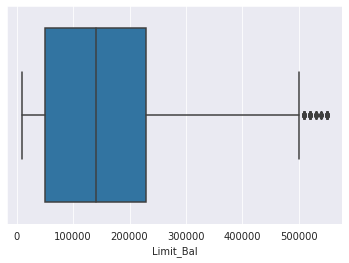

In [ ]:
sns.boxplot(x = 'Limit_Bal', data = credit)

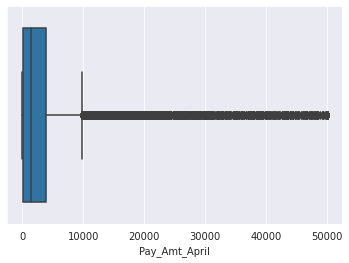

In [ ]:
sns.boxplot(x = 'Pay_Amt_April', data = credit)

There appears to still be outliers for the pay amount in April. However, this would require a more in-depth analysis to determine the outliers. Since this is a smaller session, I will continue on with the predictive models based on the most updated dataframe. 

## **Training and Scaling the Data**

As stated above, the data needs to be scaled to assist with standardizing the data. Below, all variables are scaled except for Default, since the goal is to attempt to predict whether a client will default on their credit card. The data is viewed with the new scaled data.

In [ ]:
scaler = StandardScaler()
scaler.fit(credit.drop('Default', axis = 1))

StandardScaler()

In [ ]:
scaled_data = scaler.transform(credit.drop('Default', axis = 1))

In [ ]:
credit_feat = pd.DataFrame(scaled_data, columns = credit.columns[:-1])
credit_feat.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,...,Bill_Amt_July,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_July,Pay_Amt_June,Pay_Amt_May,Pay_Amt_April
0,-1.145938,0.808931,0.181833,-1.056759,-1.241323,1.789316,1.773333,-0.701946,-0.670775,-1.531718,...,-0.674654,-0.680832,-0.671624,-0.663706,-0.364728,-0.231728,-0.325459,-0.318327,-0.315232,-0.570660
1,-0.345691,0.808931,0.181833,0.857601,-1.024683,-0.881770,1.773333,0.131865,0.182037,0.228359,...,-0.644949,-0.628190,-0.612902,-0.607288,-0.364728,-0.216941,-0.258931,-0.248680,-0.315232,-0.224495
2,-0.585765,0.808931,0.181833,0.857601,-0.158120,0.008592,0.105013,0.131865,0.182037,0.228359,...,-0.482834,-0.450267,-0.417562,-0.394695,-0.260885,-0.193169,-0.258931,-0.248680,-0.245605,0.294753
3,-0.905864,0.808931,0.181833,-1.056759,0.166841,0.008592,0.105013,0.131865,0.182037,0.228359,...,0.049729,-0.225300,-0.179425,-0.152519,-0.227912,-0.168493,-0.245626,-0.241715,-0.240800,-0.397577
4,-0.905864,-1.236200,0.181833,-1.056759,2.333247,-0.881770,0.105013,-0.701946,0.182037,0.228359,...,-0.150824,-0.343937,-0.346211,-0.332724,-0.227912,1.479504,0.339819,0.308495,-0.267259,-0.453137


Next, a train and test data split is created for the scaled data. This will be used for logistic regression, random forest, and the neural network.

In [ ]:
# Scaled train/test split 
X_train, X_test, y_train, y_test = train_test_split(scaled_data, credit['Default'], test_size = 0.30, random_state=42)

## **Logistic Regression**

The logistic regression model is created using the train and test splits. The logistic model is fit (or "trained") with the training set, then the model is tested on the testing set.

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

A confusion matrix and classification report are created to see how well the logistic regression model performed.

In [ ]:
print(confusion_matrix(y_test, predictions))

[[6616  203]
 [1507  473]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6819
           1       0.70      0.24      0.36      1980

    accuracy                           0.81      8799
   macro avg       0.76      0.60      0.62      8799
weighted avg       0.79      0.81      0.77      8799



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


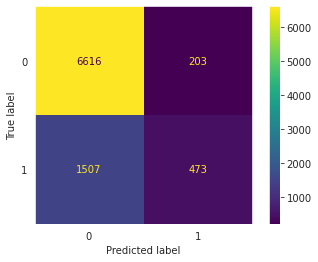

In [ ]:
plot_confusion_matrix(logmodel, X_test, y_test)
plt.grid(False)

The logistic regression model did a good job accurately predicting when a client would not default, but did not do very well predicting when a client would default.

## **Random Forest**

Next, a random forest model is created to see if it can predict when a client would default better than the logistic regression model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [ ]:
rfc_pred = rfc.predict(X_test) 

In [ ]:
print(confusion_matrix(y_test, rfc_pred))

[[6398  421]
 [1227  753]]


In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6819
           1       0.64      0.38      0.48      1980

    accuracy                           0.81      8799
   macro avg       0.74      0.66      0.68      8799
weighted avg       0.79      0.81      0.79      8799



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


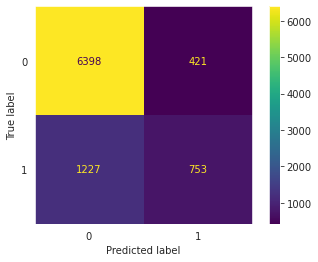

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.grid(False)

The random forest model did a better job predicting when a client would default, but actually did a little worse predicting a client who would not default. However, there wasn't a significant difference in the overall accuracy.

## **Neural Network**

Finally, a neural network model is created to see if it can create a more accurate model than the logistic regression and random forest models.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

Below is the model created. This example uses two hidden layers. Neural networks are up to the user on how to create the model for accuracy.

In [ ]:
model = Sequential()
# input layer
model.add(Dense(50,  activation='relu'))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

An early stop is created to prevent overfitting in the model.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
642/642 [==============================] - 3s 3ms/step - loss: 0.5469 - val_loss: 0.4736
Epoch 2/100
642/642 [==============================] - 2s 3ms/step - loss: 0.5002 - val_loss: 0.4625
Epoch 3/100
642/642 [==============================] - 2s 2ms/step - loss: 0.4799 - val_loss: 0.4569
Epoch 4/100
642/642 [==============================] - 2s 3ms/step - loss: 0.4701 - val_loss: 0.4525
Epoch 5/100
642/642 [==============================] - 2s 3ms/step - loss: 0.4690 - val_loss: 0.4514
Epoch 6/100
642/642 [==============================] - 2s 2ms/step - loss: 0.4631 - val_loss: 0.4527
Epoch 7/100
642/642 [==============================] - 2s 3ms/step - loss: 0.4639 - val_loss: 0.4472
Epoch 8/100
642/642 [==============================] - 2s 3ms/step - loss: 0.4621 - val_loss: 0.4484
Epoch 9/100
642/642 [==============================] - 2s 3ms/step - loss: 0.4596 - val_loss: 0.4461
Epoch 10/100
642/642 [==============================] - 3s 4ms/step - loss: 0.4572 - val_lo

In [ ]:
neural_predict = (model.predict(X_test) > 0.5).astype("int32")

275/275 [==============================] - 0s 1ms/step


In [ ]:
print(confusion_matrix(y_test, neural_predict))
print('\n')
print(classification_report(y_test, neural_predict))

[[6464  355]
 [1248  732]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6819
           1       0.67      0.37      0.48      1980

    accuracy                           0.82      8799
   macro avg       0.76      0.66      0.68      8799
weighted avg       0.80      0.82      0.80      8799



The neural network model did not seem to make any improvements over the logistic regression or random forest models. All three models have a relatively similar accuracy for both options (default vs. not default).



## **Conclusion**

This Python session attempted to create a prediction model via logistic regression, random forest, and neural network to determine if a client will deault on their credit card.

Overall, it's up to the user to decide which model to use for predicting credit card default. For me, I would use the random forest model since it did a (slightly) better job predicting if a client would default on their credit card.

In order to improve the model, a deeper look into outliers may be beneficial. I attempted to remove a few outliers by viewing a couple box plots, but a more in-depth look would be needed to confidently sort through the outliers.